In [1]:
import numpy as np
import pandas as pd

In [2]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

In [3]:
# Download Dataset from https://www.dropbox.com/scl/fo/v71bqw2zowgla028cwdh0/AEfemP4C8qQ2X5tTNXMCqUQ/Session%203?dl=0&preview=educationWage.xlsx&rlkey=rlkgo6o58ex2kjbiv4b7cr9nj&subfolder_nav_tracking=1
# and add it to colab

In [4]:
educationWageDf = pd.read_excel("https://www.dropbox.com/scl/fi/u494o4buy26erbqi1p3xj/educationWage.xlsx?rlkey=7j2bgns66szpuc6xebfhgfha5&dl=1")
# educationWageDf = pd.read_excel("./educationWage.xlsx")

In [5]:
educationWageDf

,Education,Wage
0,20,160
1,18,120
2,12,70
3,16,100
4,10,65
5,23,160
6,2,40
7,5,55


In [6]:
type(educationWageDf)

pandas.core.frame.DataFrame

In [7]:
educationWageDf["Education"], type(educationWageDf["Education"])

(0    20
 1    18
 2    12
 3    16
 4    10
 5    23
 6     2
 7     5
 Name: Education, dtype: int64,
 pandas.core.series.Series)

<Axes: xlabel='Education', ylabel='Wage'>

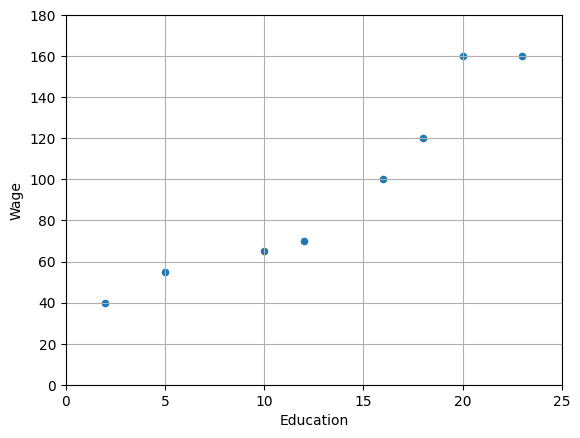

In [8]:
educationWageDf.plot.scatter(
    x = 'Education',
    y = 'Wage',
    xlim = (0, 25),
    ylim = (0, 180),
    grid = True
)


In [9]:
educationWageDf["Education"], type(educationWageDf["Education"])

(0    20
 1    18
 2    12
 3    16
 4    10
 5    23
 6     2
 7     5
 Name: Education, dtype: int64,
 pandas.core.series.Series)

In [10]:
sm.add_constant(educationWageDf["Education"]), type(sm.add_constant(educationWageDf["Education"]))

(   const  Education
 0    1.0         20
 1    1.0         18
 2    1.0         12
 3    1.0         16
 4    1.0         10
 5    1.0         23
 6    1.0          2
 7    1.0          5,
 pandas.core.frame.DataFrame)

In [11]:
educationWageLiniarRgressionModel = sm.OLS(
  educationWageDf["Wage"],
  sm.add_constant(educationWageDf["Education"])
)


In [12]:
educationWageLiniarRgressionModelFit = educationWageLiniarRgressionModel.fit()

In [13]:
print(educationWageLiniarRgressionModelFit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     57.64
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           0.000272
Time:                        20:52:19   Log-Likelihood:                -32.114
No. Observations:                   8   AIC:                             68.23
Df Residuals:                       6   BIC:                             68.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.1358     11.887      1.357      0.2

/home/jason/github/ml_models_deployments/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


In [14]:
from functions.exportModel import exportModel
exportModel({
    "modelName": "educationWageLiniarRgressionModelFit",
    "model": educationWageLiniarRgressionModelFit,
    "description": "predict Wage based on Education with linear regression",
    "baseRelativePath": "..",
    "inputs": [
        {
            "name": "const",
            "type": "int"
        },
        {
            "name": "Education",
            "type": "int"
        }
    ],
    "output": {
        "name": "Wage",
        "type": "float"
    }
})

In [15]:
educationWageLiniarRgressionModelFit.params

const        16.135762
Education     6.046358
dtype: float64

In [16]:
# wage = b0 + b1 * Education

In [17]:
predictedWage = educationWageLiniarRgressionModelFit.predict(sm.add_constant(educationWageDf["Education"]))
predictedWage

0    137.062914
1    124.970199
2     88.692053
3    112.877483
4     76.599338
5    155.201987
6     28.228477
7     46.367550
dtype: float64

In [18]:
educationWageDf['predictedWage'] = predictedWage
educationWageDf

,Education,Wage,predictedWage
0,20,160,137.062914
1,18,120,124.970199
2,12,70,88.692053
3,16,100,112.877483
4,10,65,76.599338
5,23,160,155.201987
6,2,40,28.228477
7,5,55,46.367550


In [19]:
testPredict = educationWageLiniarRgressionModelFit.predict([[1,15]])
testPredict

array([106.83112583])

In [20]:
import matplotlib.pyplot as plt


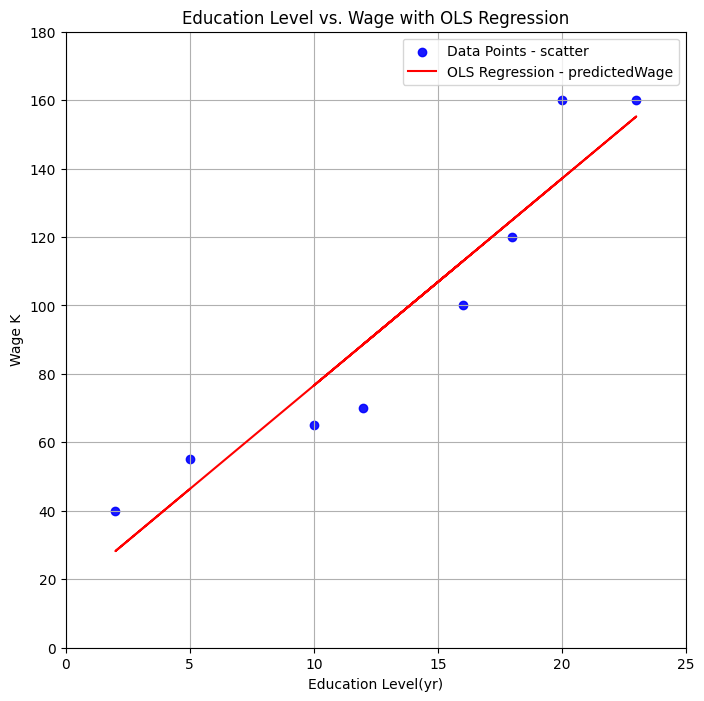

In [21]:
# Plotting
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  educationWageDf["Education"],
  educationWageDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  educationWageDf["Education"],
  educationWageDf["predictedWage"],
  color='red',
  label='OLS Regression - predictedWage'
)
plt.title('Education Level vs. Wage with OLS Regression')
plt.xlabel('Education Level(yr)')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)

plt.gca().set_xlim([0, 25])
plt.gca().set_ylim([0, 180])


plt.show()

# Another way

In [22]:
X = np.array([20, 18, 12, 16, 10, 23, 2, 5])
y = np.array([160, 120, 70 , 100, 65, 160, 40, 55])
X, y

(array([20, 18, 12, 16, 10, 23,  2,  5]),
 array([160, 120,  70, 100,  65, 160,  40,  55]))

In [23]:
X = sm.add_constant(X)

In [24]:
X

array([[ 1., 20.],
       [ 1., 18.],
       [ 1., 12.],
       [ 1., 16.],
       [ 1., 10.],
       [ 1., 23.],
       [ 1.,  2.],
       [ 1.,  5.]])

In [25]:
model = sm.OLS(y, X).fit()


In [26]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     57.64
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           0.000272
Time:                        20:52:19   Log-Likelihood:                -32.114
No. Observations:                   8   AIC:                             68.23
Df Residuals:                       6   BIC:                             68.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.1358     11.887      1.357      0.2

/home/jason/github/ml_models_deployments/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


In [27]:
print("Coefficients:", model.params)

Coefficients: [16.13576159  6.04635762]


In [28]:
predictions = model.predict([[1, 5], [1, 15]])
predictions

array([ 46.36754967, 106.83112583])

In [29]:
def predicWage(intercept, slope, yearsOfExperience):
  return intercept + (slope * yearsOfExperience)

In [30]:
predicWage(model.params[0], model.params[1], 5)

46.367549668874176

In [31]:
predicWage(model.params[0], model.params[1], 15)

106.83112582781453

# Another way

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
educationWageDf

,Education,Wage,predictedWage
0,20,160,137.062914
1,18,120,124.970199
2,12,70,88.692053
3,16,100,112.877483
4,10,65,76.599338
5,23,160,155.201987
6,2,40,28.228477
7,5,55,46.367550


In [34]:
educationWageLiniarRgressionModel2 = LinearRegression()

In [35]:
educationWageDf["Education"], type(educationWageDf["Education"])

(0    20
 1    18
 2    12
 3    16
 4    10
 5    23
 6     2
 7     5
 Name: Education, dtype: int64,
 pandas.core.series.Series)

In [36]:
educationWageDf[["Education"]], type(educationWageDf[["Education"]])

(   Education
 0         20
 1         18
 2         12
 3         16
 4         10
 5         23
 6          2
 7          5,
 pandas.core.frame.DataFrame)

In [37]:
educationWageLiniarRgressionModel2Fit = educationWageLiniarRgressionModel2.fit(
    educationWageDf[["Education"]],
    educationWageDf["Wage"]
)

In [38]:
# Print the intercept and coefficient
print("Intercept:", educationWageLiniarRgressionModel2Fit.intercept_)
print("Coefficient:", educationWageLiniarRgressionModel2Fit.coef_[0])

Intercept: 16.135761589403984
Coefficient: 6.046357615894038


In [39]:
predictions1 = educationWageLiniarRgressionModel2Fit.predict(np.array([[5], [15]]))
predictions1

/home/jason/github/ml_models_deployments/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 46.36754967, 106.83112583])

In [40]:
predicWage(educationWageLiniarRgressionModel2Fit.intercept_, educationWageLiniarRgressionModel2Fit.coef_[0], 5)

46.367549668874176

In [41]:
predicWage(educationWageLiniarRgressionModel2Fit.intercept_, educationWageLiniarRgressionModel2Fit.coef_[0], 15)

106.83112582781456

In [42]:
predictedWage2 = educationWageLiniarRgressionModel2Fit.predict(educationWageDf[["Education"]])
educationWageDf['predictedWage2'] = predictedWage2
educationWageDf

,Education,Wage,predictedWage,predictedWage2
0,20,160,137.062914,137.062914
1,18,120,124.970199,124.970199
2,12,70,88.692053,88.692053
3,16,100,112.877483,112.877483
4,10,65,76.599338,76.599338
5,23,160,155.201987,155.201987
6,2,40,28.228477,28.228477
7,5,55,46.367550,46.367550


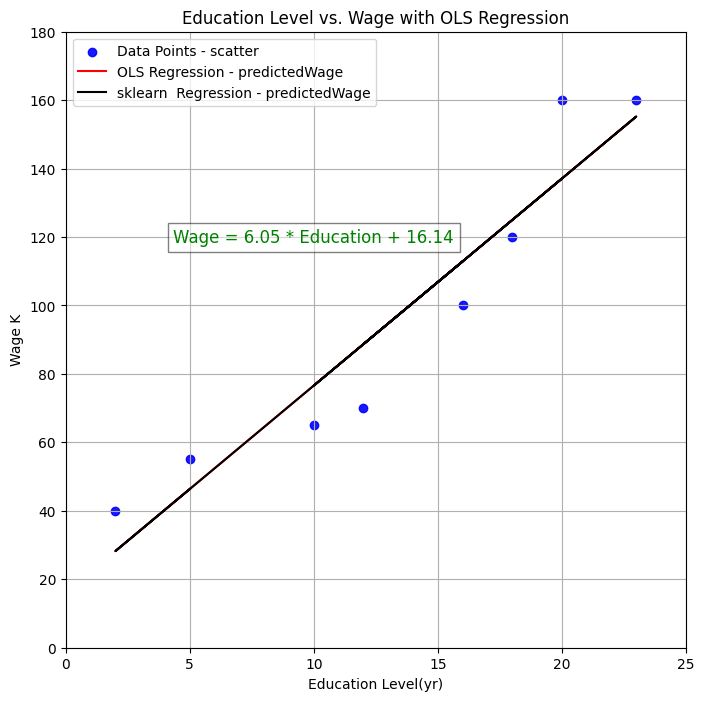

In [43]:
# Plotting
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  educationWageDf["Education"],
  educationWageDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  educationWageDf["Education"],
  educationWageDf["predictedWage"],
  color='red',
  label='OLS Regression - predictedWage'
)
plt.plot(
  educationWageDf["Education"],
  educationWageDf["predictedWage2"],
  color='black',
  label='sklearn  Regression - predictedWage'
)
plt.title('Education Level vs. Wage with OLS Regression')
plt.xlabel('Education Level(yr)')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)

plt.gca().set_xlim([0, 25])
plt.gca().set_ylim([0, 180])


equation = f'Wage = {educationWageLiniarRgressionModel2Fit.coef_[0]:.2f} * Education + {educationWageLiniarRgressionModel2Fit.intercept_:.2f}'


plt.text(
    10, 120,
    equation,
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=12,
    color="green",
    bbox=dict(facecolor='white', alpha=0.5)
)



plt.show()

# Real dataset

In [44]:
import pandas as pd

Download it from [here](https://www.dropbox.com/scl/fi/1sc8ojfezlbrcaje42w0n/College.xlsx?rlkey=i3starhohiwkua8ekbjk3nb92&st=yd75jyvp&dl=0)

In [45]:
# collegeDf = pd.read_excel("./College.xlsx")
collegeDf = pd.read_excel("https://www.dropbox.com/scl/fi/sqdbxs8c9r55s2qleal8t/College.xlsx?rlkey=c751oujzls8oxzwd0l89pcv5k&dl=1")

In [46]:
collegeDf.head()

,School,Earnings,Cost,Grad,Debt,City
0,St. Ambrose C (NC),44800,22920,62,88,1
1,"Albion College (Albion, MI)",45100,23429,73,92,0
2,"Alfred University (Alfred, NY)",42300,19567,63,87,0
3,"Allegheny College (Meadville, PA)",49200,25147,78,92,0
4,"Beloit College (Beloit, WI)",37900,21979,78,93,1


In [47]:
collegeDf.tail()

,School,Earnings,Cost,Grad,Debt,City
111,"Whittier College (Whittier, CA)",45100,33181,67,86,0
112,"Widener University (Chester, PA)",51700,27387,56,83,0
113,"Willamette University (Salem, OR)",49200,30312,78,93,1
114,"Winthrop University (Rock Hill, SC)",36100,15311,54,76,1
115,"Wittenberg University (Springfield, OH)",42700,26616,64,90,1


In [48]:
collegeDf.shape

(116, 6)

In [49]:
collegeDf.size

696

In [50]:
collegeDf.describe()

,Earnings,Cost,Grad,Debt,City
count,116.000000,116.000000,116.000000,116.000000,116.000000
mean,46477.586207,25251.689655,65.681034,88.405172,0.508621
std,7341.876152,5387.152858,11.764796,6.838482,0.502095
min,32300.000000,9938.000000,32.000000,52.000000,0.000000
25%,42300.000000,21674.250000,59.000000,86.000000,0.000000
50%,45150.000000,24957.500000,67.000000,90.000000,1.000000
75%,51000.000000,29489.750000,75.000000,93.000000,1.000000
max,74900.000000,35159.000000,86.000000,98.000000,1.000000


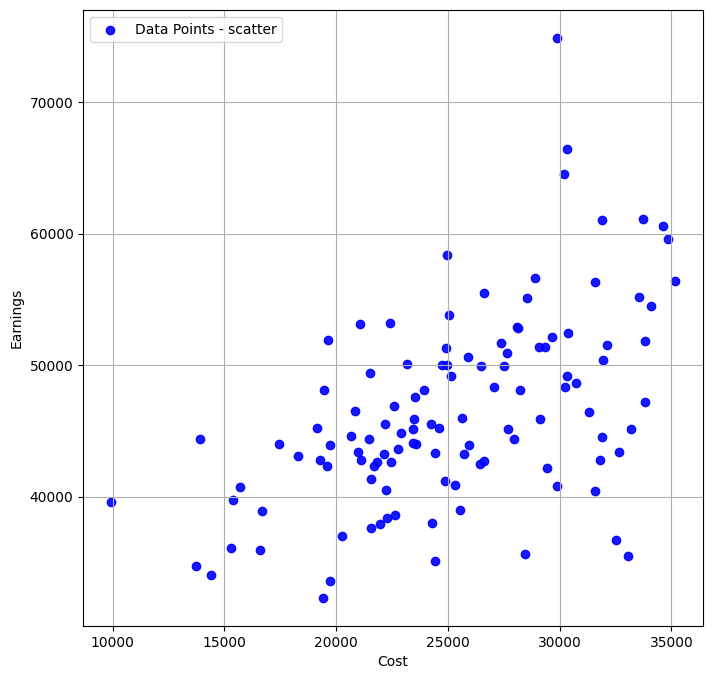

In [51]:
# Plotting
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  collegeDf["Cost"],
  collegeDf["Earnings"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.xlabel('Cost')
plt.ylabel('Earnings')
plt.legend()
plt.grid(True)



plt.show()

In [52]:
sm.add_constant(collegeDf['Cost']), type(sm.add_constant(collegeDf['Cost']))

(     const   Cost
 0      1.0  22920
 1      1.0  23429
 2      1.0  19567
 3      1.0  25147
 4      1.0  21979
 ..     ...    ...
 111    1.0  33181
 112    1.0  27387
 113    1.0  30312
 114    1.0  15311
 115    1.0  26616
 
 [116 rows x 2 columns],
 pandas.core.frame.DataFrame)

In [53]:
earningOthersOlsModelFit1 = sm.OLS(
  collegeDf["Earnings"],
  sm.add_constant(collegeDf['Cost'])
).fit()

In [54]:
print(earningOthersOlsModelFit1.summary())

                            OLS Regression Results                            
Dep. Variable:               Earnings   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     43.61
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.33e-09
Time:                        20:52:21   Log-Likelihood:                -1177.9
No. Observations:                 116   AIC:                             2360.
Df Residuals:                     114   BIC:                             2365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.838e+04   2802.417     10.125      0.0

In [57]:
from functions.exportModel import exportModel
exportModel({
    "modelName": "earningOthersOlsModelFit1",
    "model": earningOthersOlsModelFit1,
    "description": "predict Earnings based on Cost",
    "baseRelativePath": "..",
    "inputs": [
        {
            "name": "const",
            "type": "int"
        },
        {
            "name": "Cost",
            "type": "float"
        }
    ],
    "output": {
        "name": "Earnings",
        "type": "float"
    }
})

In [58]:
predictedEarning1 = earningOthersOlsModelFit1.predict(sm.add_constant(collegeDf["Cost"]))
collegeDf['predictedEarning1'] = predictedEarning1
collegeDf

,School,Earnings,Cost,Grad,Debt,City,predictedEarning1
0,St. Ambrose C (NC),44800,22920,62,88,1,44806.067625
1,"Albion College (Albion, MI)",45100,23429,73,92,0,45170.954503
2,"Alfred University (Alfred, NY)",42300,19567,63,87,0,42402.402200
3,"Allegheny College (Meadville, PA)",49200,25147,78,92,0,46402.537324
4,"Beloit College (Beloit, WI)",37900,21979,78,93,1,44131.492866
...,...,...,...,...,...,...,...
111,"Whittier College (Whittier, CA)",45100,33181,67,86,0,52161.871659
112,"Widener University (Chester, PA)",51700,27387,56,83,0,48008.326334
113,"Willamette University (Salem, OR)",49200,30312,78,93,1,50105.171359
114,"Winthrop University (Rock Hill, SC)",36100,15311,54,76,1,39351.403080


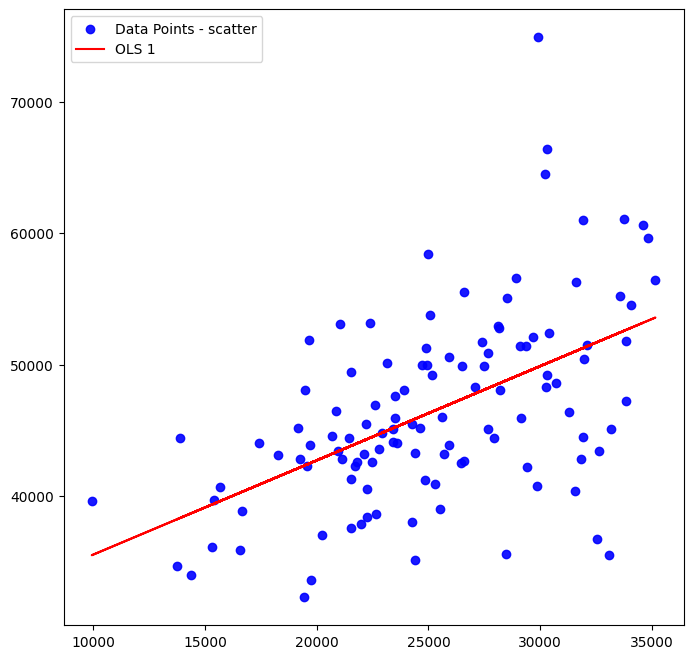

In [59]:
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  collegeDf["Cost"],
  collegeDf["Earnings"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)


plt.plot(
  collegeDf["Cost"],
  collegeDf["predictedEarning1"],
  color='red',
  label='OLS 1'
)

plt.legend()

plt.show()

In [60]:
collegeDf

,School,Earnings,Cost,Grad,Debt,City,predictedEarning1
0,St. Ambrose C (NC),44800,22920,62,88,1,44806.067625
1,"Albion College (Albion, MI)",45100,23429,73,92,0,45170.954503
2,"Alfred University (Alfred, NY)",42300,19567,63,87,0,42402.402200
3,"Allegheny College (Meadville, PA)",49200,25147,78,92,0,46402.537324
4,"Beloit College (Beloit, WI)",37900,21979,78,93,1,44131.492866
...,...,...,...,...,...,...,...
111,"Whittier College (Whittier, CA)",45100,33181,67,86,0,52161.871659
112,"Widener University (Chester, PA)",51700,27387,56,83,0,48008.326334
113,"Willamette University (Salem, OR)",49200,30312,78,93,1,50105.171359
114,"Winthrop University (Rock Hill, SC)",36100,15311,54,76,1,39351.403080


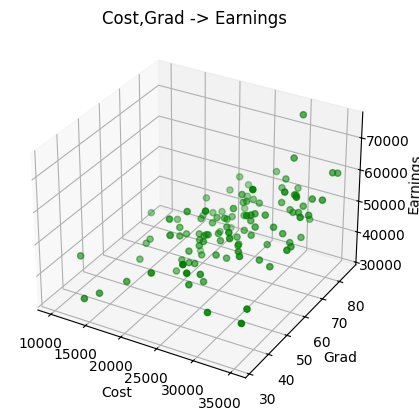

In [61]:
fig = plt.figure()
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(
  collegeDf["Cost"],
  collegeDf["Grad"],
  collegeDf["Earnings"],
  color = "green"
)
plt.title("Cost,Grad -> Earnings")
ax.set_xlabel('Cost')
ax.set_ylabel('Grad')
ax.set_zlabel('Earnings')

# show plot
plt.show()

In [62]:
collegeDf[['Cost', 'Grad']], type(collegeDf[['Cost', 'Grad']])

(      Cost  Grad
 0    22920    62
 1    23429    73
 2    19567    63
 3    25147    78
 4    21979    78
 ..     ...   ...
 111  33181    67
 112  27387    56
 113  30312    78
 114  15311    54
 115  26616    64
 
 [116 rows x 2 columns],
 pandas.core.frame.DataFrame)

In [63]:
sm.add_constant(collegeDf[['Cost', 'Grad']]), type(sm.add_constant(collegeDf[['Cost', 'Grad']]))

(     const   Cost  Grad
 0      1.0  22920    62
 1      1.0  23429    73
 2      1.0  19567    63
 3      1.0  25147    78
 4      1.0  21979    78
 ..     ...    ...   ...
 111    1.0  33181    67
 112    1.0  27387    56
 113    1.0  30312    78
 114    1.0  15311    54
 115    1.0  26616    64
 
 [116 rows x 3 columns],
 pandas.core.frame.DataFrame)

In [64]:
earningOthersOlsModelFit2 = sm.OLS(
  collegeDf["Earnings"],
  sm.add_constant(collegeDf[['Cost', 'Grad']])
).fit()

In [65]:
print(earningOthersOlsModelFit2.summary())

                            OLS Regression Results                            
Dep. Variable:               Earnings   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     37.37
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           3.50e-13
Time:                        20:53:35   Log-Likelihood:                -1167.2
No. Observations:                 116   AIC:                             2340.
Df Residuals:                     113   BIC:                             2349.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.798e+04   3366.727      5.341      0.0

In [67]:
from functions.exportModel import exportModel
exportModel({
    "modelName": "earningOthersOlsModelFit2",
    "model": earningOthersOlsModelFit2,
    "description": "predict Earnings based on Cost and Grad",
    "baseRelativePath": "..",
    "inputs": [
        {
            "name": "const",
            "type": "int"
        },
        {
            "name": "Cost",
            "type": "float"
        },
        {
            "name": "Grad",
            "type": "int"
        },
    ],
    "output": {
        "name": "Earnings",
        "type": "float"
    }
})

In [68]:
predictedEarning2 = earningOthersOlsModelFit2.predict(
  sm.add_constant(collegeDf[['Cost', 'Grad']])
)
collegeDf['predictedEarning2'] = predictedEarning2
collegeDf

,School,Earnings,Cost,Grad,Debt,City,predictedEarning1,predictedEarning2
0,St. Ambrose C (NC),44800,22920,62,88,1,44806.067625,44410.232770
1,"Albion College (Albion, MI)",45100,23429,73,92,0,45170.954503,47274.057585
2,"Alfred University (Alfred, NY)",42300,19567,63,87,0,42402.402200,42926.395289
3,"Allegheny College (Meadville, PA)",49200,25147,78,92,0,46402.537324,49338.597282
4,"Beloit College (Beloit, WI)",37900,21979,78,93,1,44131.492866,47713.079376
...,...,...,...,...,...,...,...,...
111,"Whittier College (Whittier, CA)",45100,33181,67,86,0,52161.871659,50858.231896
112,"Widener University (Chester, PA)",51700,27387,56,83,0,48008.326334,45282.645045
113,"Willamette University (Salem, OR)",49200,30312,78,93,1,50105.171359,51988.786671
114,"Winthrop University (Rock Hill, SC)",36100,15311,54,76,1,39351.403080,38613.174391


In [69]:
# if 'google.colab' in str(get_ipython()):
#         get_ipython().run_line_magic('matplotlib', 'inline')

# %matplotlib notebook
# # %matplotlib notebook
%matplotlib inline

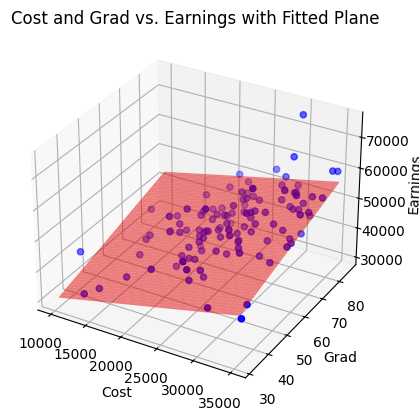

In [70]:
# Extracting coefficients
intercept = earningOthersOlsModelFit2.params['const']
coef_cost = earningOthersOlsModelFit2.params['Cost']
coef_grad = earningOthersOlsModelFit2.params['Grad']

# Create 3D grid for plotting
cost_range = np.linspace(collegeDf['Cost'].min(), collegeDf['Cost'].max(), 100)
grad_range = np.linspace(collegeDf['Grad'].min(), collegeDf['Grad'].max(), 100)
cost_grid, grad_grid = np.meshgrid(cost_range, grad_range)

# Calculate predicted earnings for each combination of cost and grad
earnings_predicted = intercept + coef_cost * cost_grid + coef_grad * grad_grid




fig = plt.figure()
ax = plt.axes(projection ="3d")

# Scatter plot of the actual data points
ax.scatter(collegeDf['Cost'], collegeDf['Grad'], collegeDf['Earnings'], color='blue', label='Actual Earnings')

# Plotting the fitted plane
ax.plot_surface(cost_grid, grad_grid, earnings_predicted, color='red', alpha=0.5, label='Fitted Plane')

# Labeling axes
ax.set_xlabel('Cost')
ax.set_ylabel('Grad')
ax.set_zlabel('Earnings')



plt.title('Cost and Grad vs. Earnings with Fitted Plane')

# Rotating the plot
# ax.view_init(elev=0, azim=0)  # Set the elevation and azimuth angles
plt.show()



In [71]:
collegeDf

,School,Earnings,Cost,Grad,Debt,City,predictedEarning1,predictedEarning2
0,St. Ambrose C (NC),44800,22920,62,88,1,44806.067625,44410.232770
1,"Albion College (Albion, MI)",45100,23429,73,92,0,45170.954503,47274.057585
2,"Alfred University (Alfred, NY)",42300,19567,63,87,0,42402.402200,42926.395289
3,"Allegheny College (Meadville, PA)",49200,25147,78,92,0,46402.537324,49338.597282
4,"Beloit College (Beloit, WI)",37900,21979,78,93,1,44131.492866,47713.079376
...,...,...,...,...,...,...,...,...
111,"Whittier College (Whittier, CA)",45100,33181,67,86,0,52161.871659,50858.231896
112,"Widener University (Chester, PA)",51700,27387,56,83,0,48008.326334,45282.645045
113,"Willamette University (Salem, OR)",49200,30312,78,93,1,50105.171359,51988.786671
114,"Winthrop University (Rock Hill, SC)",36100,15311,54,76,1,39351.403080,38613.174391


In [72]:
earningOthersOlsModelFit3 = sm.OLS(
  collegeDf["Earnings"],
  sm.add_constant(collegeDf[['Cost', 'Grad','Debt']])
).fit()

In [73]:
from functions.exportModel import exportModel
exportModel({
    "modelName": "earningOthersOlsModelFit3",
    "model": earningOthersOlsModelFit3,
    "description": "predict Earnings based on Cost, Grad and Debt",
    "baseRelativePath": "..",
    "inputs": [
        {
            "name": "const",
            "type": "int"
        },
        {
            "name": "Cost",
            "type": "float"
        },
        {
            "name": "Grad",
            "type": "int"
        },
        {
            "name": "Debt",
            "type": "int"
        },
    ],
    "output": {
        "name": "Earnings",
        "type": "float"
    }
})

In [74]:
print(earningOthersOlsModelFit3.summary())

                            OLS Regression Results                            
Dep. Variable:               Earnings   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     25.12
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.67e-12
Time:                        20:54:18   Log-Likelihood:                -1166.8
No. Observations:                 116   AIC:                             2342.
Df Residuals:                     112   BIC:                             2353.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.182e+04   7735.631      1.528      0.1

In [75]:
print(earningOthersOlsModelFit2.summary())

                            OLS Regression Results                            
Dep. Variable:               Earnings   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     37.37
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           3.50e-13
Time:                        20:54:19   Log-Likelihood:                -1167.2
No. Observations:                 116   AIC:                             2340.
Df Residuals:                     113   BIC:                             2349.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.798e+04   3366.727      5.341      0.0

In [76]:
predictedEarning3 = earningOthersOlsModelFit3.predict(
  sm.add_constant(collegeDf[['Cost', 'Grad', 'Debt']])
)
collegeDf['predictedEarning3'] = predictedEarning3
collegeDf

,School,Earnings,Cost,Grad,Debt,City,predictedEarning1,predictedEarning2,predictedEarning3
0,St. Ambrose C (NC),44800,22920,62,88,1,44806.067625,44410.232770,44548.538177
1,"Albion College (Albion, MI)",45100,23429,73,92,0,45170.954503,47274.057585,47343.527426
2,"Alfred University (Alfred, NY)",42300,19567,63,87,0,42402.402200,42926.395289,42943.384593
3,"Allegheny College (Meadville, PA)",49200,25147,78,92,0,46402.537324,49338.597282,49174.396984
4,"Beloit College (Beloit, WI)",37900,21979,78,93,1,44131.492866,47713.079376,47679.311039
...,...,...,...,...,...,...,...,...,...
111,"Whittier College (Whittier, CA)",45100,33181,67,86,0,52161.871659,50858.231896,50484.047251
112,"Widener University (Chester, PA)",51700,27387,56,83,0,48008.326334,45282.645045,45124.951685
113,"Willamette University (Salem, OR)",49200,30312,78,93,1,50105.171359,51988.786671,51887.221654
114,"Winthrop University (Rock Hill, SC)",36100,15311,54,76,1,39351.403080,38613.174391,37909.006123
